## Load Data

In [1]:
import pandas as pd

excel_file_path = r'd:\Users\A.Fallah\Desktop\Price Estimation Model\UpdatedPrice-Median-smooth.xlsx'
df = pd.read_excel(excel_file_path)
df

,Unnamed: 0,id,area,fee,price_per_m2,log_price_per_m2,trace_id_date,new_date,year,month,tag,floors_count,unit_per_floor,postal_code,district,neighborhood,base_average_price,current_average_price,update_price
0,0,12986672,95,7630000000,80315789,18.201477,1402-05-02,140205,1402,5,2,5,2,11116,11,منیریه,6.562500e+07,6.083333e+07,7.445146e+07
1,1,12986671,50,2900000000,58000000,17.875954,1402-05-11,140205,1402,5,2,4,1,11116,11,منیریه,6.562500e+07,6.083333e+07,5.376508e+07
2,2,13066645,53,3000000000,56603773,17.851586,1402-06-20,140206,1402,6,2,5,2,11116,11,منیریه,6.562500e+07,6.083333e+07,5.247080e+07
3,3,13096738,76,4800000000,63157894,17.961148,1402-07-16,140207,1402,7,3,5,2,11116,11,منیریه,6.083333e+07,6.083333e+07,6.315789e+07
4,4,13096737,80,4800000000,60000000,17.909855,1402-08-01,140208,1402,8,3,4,1,11116,11,منیریه,6.083333e+07,6.083333e+07,6.000000e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964167,964167,8063395,89,485000000,5449438,15.511023,1394-09-16,139409,1394,9,4,5,2,19838,1,حاشیه کوهسار,9.238608e+06,1.431056e+08,8.441154e+07
964168,964168,8063396,137,300000000,2189781,14.599312,1394-09-14,139409,1394,9,4,0,0,19838,1,حاشیه کوهسار,9.238608e+06,1.431056e+08,3.391960e+07
964169,964169,8063398,117,937000000,8008547,15.896020,1394-09-10,139409,1394,9,4,10,3,19838,1,حاشیه کوهسار,9.238608e+06,1.431056e+08,1.240520e+08
964170,964170,8063397,147,310000000,2108843,14.561650,1394-09-14,139409,1394,9,4,0,0,19838,1,حاشیه کوهسار,9.238608e+06,1.431056e+08,3.266588e+07


### Cleaning Data

In [2]:
df_xgboost = df.copy()
df_xgboost = df_xgboost[df_xgboost['floors_count'] <= 50]
df_xgboost = df_xgboost[df_xgboost['unit_per_floor'] <= 100]
df_xgboost = df_xgboost[df_xgboost['unit_per_floor'] > 0]
df_xgboost

,Unnamed: 0,id,area,fee,price_per_m2,log_price_per_m2,trace_id_date,new_date,year,month,tag,floors_count,unit_per_floor,postal_code,district,neighborhood,base_average_price,current_average_price,update_price
0,0,12986672,95,7630000000,80315789,18.201477,1402-05-02,140205,1402,5,2,5,2,11116,11,منیریه,6.562500e+07,6.083333e+07,7.445146e+07
1,1,12986671,50,2900000000,58000000,17.875954,1402-05-11,140205,1402,5,2,4,1,11116,11,منیریه,6.562500e+07,6.083333e+07,5.376508e+07
2,2,13066645,53,3000000000,56603773,17.851586,1402-06-20,140206,1402,6,2,5,2,11116,11,منیریه,6.562500e+07,6.083333e+07,5.247080e+07
3,3,13096738,76,4800000000,63157894,17.961148,1402-07-16,140207,1402,7,3,5,2,11116,11,منیریه,6.083333e+07,6.083333e+07,6.315789e+07
4,4,13096737,80,4800000000,60000000,17.909855,1402-08-01,140208,1402,8,3,4,1,11116,11,منیریه,6.083333e+07,6.083333e+07,6.000000e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964165,964165,8063393,142,1000000000,7042253,15.767439,1394-09-23,139409,1394,9,4,9,1,19838,1,حاشیه کوهسار,9.238608e+06,1.431056e+08,1.090842e+08
964166,964166,8063394,180,1800000000,10000000,16.118096,1394-09-16,139409,1394,9,4,8,1,19838,1,حاشیه کوهسار,9.238608e+06,1.431056e+08,1.548995e+08
964167,964167,8063395,89,485000000,5449438,15.511023,1394-09-16,139409,1394,9,4,5,2,19838,1,حاشیه کوهسار,9.238608e+06,1.431056e+08,8.441154e+07
964169,964169,8063398,117,937000000,8008547,15.896020,1394-09-10,139409,1394,9,4,10,3,19838,1,حاشیه کوهسار,9.238608e+06,1.431056e+08,1.240520e+08


In [3]:
grouped_df = df_xgboost.groupby(['neighborhood', 'district'])
df_xgboost['update_fee'] = df_xgboost['area'] * df_xgboost['update_price']
df_xgboost['weighted_average_price'] = grouped_df['update_fee'].transform('sum')/grouped_df['area'].transform('sum')
df_xgboost

,Unnamed: 0,id,area,fee,price_per_m2,log_price_per_m2,trace_id_date,new_date,year,month,...,floors_count,unit_per_floor,postal_code,district,neighborhood,base_average_price,current_average_price,update_price,update_fee,weighted_average_price
0,0,12986672,95,7630000000,80315789,18.201477,1402-05-02,140205,1402,5,...,5,2,11116,11,منیریه,6.562500e+07,6.083333e+07,7.445146e+07,7.072889e+09,6.328666e+07
1,1,12986671,50,2900000000,58000000,17.875954,1402-05-11,140205,1402,5,...,4,1,11116,11,منیریه,6.562500e+07,6.083333e+07,5.376508e+07,2.688254e+09,6.328666e+07
2,2,13066645,53,3000000000,56603773,17.851586,1402-06-20,140206,1402,6,...,5,2,11116,11,منیریه,6.562500e+07,6.083333e+07,5.247080e+07,2.780952e+09,6.328666e+07
3,3,13096738,76,4800000000,63157894,17.961148,1402-07-16,140207,1402,7,...,5,2,11116,11,منیریه,6.083333e+07,6.083333e+07,6.315789e+07,4.800000e+09,6.328666e+07
4,4,13096737,80,4800000000,60000000,17.909855,1402-08-01,140208,1402,8,...,4,1,11116,11,منیریه,6.083333e+07,6.083333e+07,6.000000e+07,4.800000e+09,6.328666e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964165,964165,8063393,142,1000000000,7042253,15.767439,1394-09-23,139409,1394,9,...,9,1,19838,1,حاشیه کوهسار,9.238608e+06,1.431056e+08,1.090842e+08,1.548995e+10,9.843679e+07
964166,964166,8063394,180,1800000000,10000000,16.118096,1394-09-16,139409,1394,9,...,8,1,19838,1,حاشیه کوهسار,9.238608e+06,1.431056e+08,1.548995e+08,2.788191e+10,9.843679e+07
964167,964167,8063395,89,485000000,5449438,15.511023,1394-09-16,139409,1394,9,...,5,2,19838,1,حاشیه کوهسار,9.238608e+06,1.431056e+08,8.441154e+07,7.512627e+09,9.843679e+07
964169,964169,8063398,117,937000000,8008547,15.896020,1394-09-10,139409,1394,9,...,10,3,19838,1,حاشیه کوهسار,9.238608e+06,1.431056e+08,1.240520e+08,1.451409e+10,9.843679e+07


In [4]:
sel = ['neighborhood','district', 'weighted_average_price']
df_avg = df_xgboost[sel]
df_avg = df_avg.drop_duplicates()
df_avg

,neighborhood,district,weighted_average_price
0,منیریه,11,6.328666e+07
1853,سنگلج,12,4.534295e+07
2060,ارگ - پامنار,12,4.930062e+07
2210,کوی نصر,2,1.418443e+08
2605,فردوسی,12,6.851157e+07
...,...,...,...
962951,حاشیه چیتگر,21,3.532891e+07
962954,حاشیه حکیمیه,4,5.291702e+07
963563,حاشیه دربند,1,9.373373e+07
963640,حاشیه جماران,1,1.767652e+08


In [37]:
df_avg.to_csv(r"d:\Users\A.Fallah\Desktop\Price Estimation Model\Average-Neighborhood.csv", index=False)

#### Adding Construction Year

In [15]:
import pandas as pd

excel_file_path = r'd:\Users\A.Fallah\Desktop\Price Estimation Model\IranAmlaakAllRecords-Tehran-BuildingAge.csv'
All_Age = pd.read_csv(excel_file_path)
df_xgboost = pd.merge(df_xgboost, All_Age[['id', 'sale_sakht']], on='id', how='left')
df_xgboost['building_age'] = df_xgboost['year'] - df_xgboost['sale_sakht']
df_xgboost

,Unnamed: 0,id,area,fee,price_per_m2,log_price_per_m2,trace_id_date,new_date,year,month,...,postal_code,district,neighborhood,base_average_price,current_average_price,update_price,neighborhood_label,update_price_log,sale_sakht,building_age
0,0,12986672,95,7630000000,80315789,18.201477,1402-05-02,140205,1402,5,...,11116,11,منیریه,6.562500e+07,6.083333e+07,7.445146e+07,274,18.125658,1397.0,5.0
1,1,12986671,50,2900000000,58000000,17.875954,1402-05-11,140205,1402,5,...,11116,11,منیریه,6.562500e+07,6.083333e+07,5.376508e+07,274,17.800135,1380.0,22.0
2,2,13066645,53,3000000000,56603773,17.851586,1402-06-20,140206,1402,6,...,11116,11,منیریه,6.562500e+07,6.083333e+07,5.247080e+07,274,17.775767,1348.0,54.0
3,3,13096738,76,4800000000,63157894,17.961148,1402-07-16,140207,1402,7,...,11116,11,منیریه,6.083333e+07,6.083333e+07,6.315789e+07,274,17.961148,1392.0,10.0
4,4,13096737,80,4800000000,60000000,17.909855,1402-08-01,140208,1402,8,...,11116,11,منیریه,6.083333e+07,6.083333e+07,6.000000e+07,274,17.909855,1388.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956219,964165,8063393,142,1000000000,7042253,15.767439,1394-09-23,139409,1394,9,...,19838,1,حاشیه کوهسار,9.238608e+06,1.431056e+08,1.090842e+08,102,18.507630,1394.0,0.0
956220,964166,8063394,180,1800000000,10000000,16.118096,1394-09-16,139409,1394,9,...,19838,1,حاشیه کوهسار,9.238608e+06,1.431056e+08,1.548995e+08,102,18.858287,1394.0,0.0
956221,964167,8063395,89,485000000,5449438,15.511023,1394-09-16,139409,1394,9,...,19838,1,حاشیه کوهسار,9.238608e+06,1.431056e+08,8.441154e+07,102,18.251215,1386.0,8.0
956222,964169,8063398,117,937000000,8008547,15.896020,1394-09-10,139409,1394,9,...,19838,1,حاشیه کوهسار,9.238608e+06,1.431056e+08,1.240520e+08,102,18.636212,1394.0,0.0


## Model Tuning


In [6]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Function to train and evaluate XGBoost model for given parameters
def train_and_evaluate(X_train, X_test, y_train, y_test, params):
    xgb_reg = xgb.XGBRegressor(**params)
    xgb_reg.fit(X_train, y_train)
    y_pred = xgb_reg.predict(X_test)
    y_pred_train = xgb_reg.predict(X_train)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    mse_t = mean_squared_error(y_train, y_pred_train)
    rmse_t = mean_squared_error(y_train, y_pred_train, squared=False)
    r2_t = r2_score(y_train, y_pred_train)
    feature_importance = pd.Series(xgb_reg.feature_importances_, index=X.columns)
    return {
        'n_estimators': params['n_estimators'],
        'max_depth': params['max_depth'],
        'RMSE': rmse,
        'RMSE_train': rmse_t,
        'R2': r2,
        'R2_train': r2_t,
        'Feature_Importance': feature_importance
    }



# Define X and y
X = df_xgboost[['floors_count', 'unit_per_floor', 'weighted_average_price', 'area']]
df_xgboost['update_price_log'] = np.log(df_xgboost['update_price'])
y = df_xgboost['update_price_log']

# Split the data into training and testing sets with shuffling
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Split the training set further into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.1, random_state=42, shuffle=True)



param_combinations = []
for n_estimators in [100, 150]:
    for max_depth in [16, 20]:
        params = {
            'objective': 'reg:squarederror',
            'learning_rate': 0.1,
            'max_depth': max_depth,
            'min_child_weight': 1,
            'n_estimators': n_estimators,
            'subsample': 0.8,
            'colsample_bytree': 0.8,
            'gamma': 0,
            'random_state': 42
        }
        param_combinations.append(params)

results = []
for params in param_combinations:
    result = train_and_evaluate(X_train, X_val, y_train, y_val, params)
    results.append(result)

# Create DataFrame from results
results_df = pd.DataFrame(results)
results_df[['RMSE', 'RMSE_train', 'R2', 'R2_train']] = results_df[['RMSE', 'RMSE_train', 'R2', 'R2_train']].applymap(lambda x: "{:,.3f}".format(x))
results_df['n_estimators'] = results_df['n_estimators'].astype(str)
results_df['max_depth'] = results_df['max_depth'].astype(str)

results_df


,n_estimators,max_depth,RMSE,RMSE_train,R2,R2_train,Feature_Importance
0,100,16,0.227,0.203,0.760,0.809,floors_count 0.093276 unit_per_fl...
1,100,20,0.229,0.189,0.756,0.834,floors_count 0.121167 unit_per_fl...
2,150,16,0.228,0.197,0.758,0.821,floors_count 0.085643 unit_per_fl...
3,150,20,0.232,0.181,0.749,0.848,floors_count 0.108902 unit_per_fl...


## XGBoost Model

In [7]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import pickle


# Define neighborhood_label
# df_xgboost['neighborhood_label'] = df_xgboost['neighborhood']
# label_encoder = LabelEncoder()
# df_xgboost['neighborhood_label'] = label_encoder.fit_transform(df_xgboost['neighborhood_label'])
# df_xgboost['neighborhood_label'] = df_xgboost['neighborhood_label'].astype('category')

# Define X and y
X = df_xgboost[['floors_count', 'unit_per_floor', 'weighted_average_price', 'area']]
df_xgboost['update_price_log'] = np.log(df_xgboost['update_price'])
y = df_xgboost['update_price_log']

# Split the data into training and testing sets with shuffling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Define parameters for XGBoost regressor
params = {
    'objective': 'reg:squarederror',  
    'learning_rate': 0.1,             
    'max_depth': 16,                   
    'min_child_weight': 1, 
    'n_estimators': 150,              
    'subsample': 0.8,                 
    'colsample_bytree': 0.8,          
    'gamma': 0,                       
    'random_state': 42,
    'enable_categorical': True,
    'tree_method': 'hist'               
}

# Instantiate XGBoost regressor with the specified parameters
xgb_reg = xgb.XGBRegressor(**params)

# Train the model
xgb_reg.fit(X_train, y_train)

y_pred = xgb_reg.predict(X_test)
y_pred_train = xgb_reg.predict(X_train)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Calculate RMSE
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R2 Score:", r2)

mse_t = mean_squared_error(y_train, y_pred_train)
rmse_t = mean_squared_error(y_train, y_pred_train, squared=False)  # Calculate RMSE
r2_t = r2_score(y_train, y_pred_train)
print("Mean Squared Error Train:", mse_t)
print("Root Mean Squared Error Train:", rmse_t)
print("R2 Score:", r2_t)

# Feature Importance
feature_importance = pd.Series(xgb_reg.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importance:")
print(feature_importance)

# Save the trained model to a file
with open("xgboost_model.pkl", "wb") as f:
    pickle.dump(xgb_reg, f)



Mean Squared Error: 0.05239824172013136
Root Mean Squared Error: 0.22890662227233916
R2 Score: 0.7570008919060222
Mean Squared Error Train: 0.04173846162033927
Root Mean Squared Error Train: 0.20429993054413717
R2 Score: 0.8066980840361784
Feature Importance:
weighted_average_price    0.782392
area                      0.116013
floors_count              0.071469
unit_per_floor            0.030127
dtype: float32


In [8]:
import pickle

def price_estimation(X):
    with open("xgboost_model.pkl", "rb") as f:
        xgb_reg_loaded = pickle.load(f)
    Y = xgb_reg_loaded.predict(X)
    df_pred = pd.DataFrame({'y_pred': Y})
    return df_pred

In [9]:
price_est2 = price_estimation(X_test)

In [10]:
price_est2

,y_pred
0,17.986845
1,17.621704
2,18.477442
3,19.099211
4,17.903641
...,...
191240,18.501713
191241,18.532188
191242,17.961468
191243,18.552305


In [11]:
df_test = pd.DataFrame({'y_test': y_test})
df_test = df_test.reset_index()
df_x = pd.concat([df_test, price_est2], axis=1)
#df_x = df_x.drop(df_x['index'])
df_x

,index,y_test,y_pred
0,722379,18.424476,17.986845
1,39235,17.872454,17.621704
2,878218,18.768225,18.477442
3,889521,19.076739,19.099211
4,785186,17.845641,17.903641
...,...,...,...
191240,416770,18.383743,18.501713
191241,265806,18.526306,18.532188
191242,717544,18.191672,17.961468
191243,927036,18.410767,18.552305


In [12]:
df_x['diff'] = (df_x['y_test'] - df_x['y_pred'])
df_x['abs_diff'] = np.abs(df_x['diff'] )


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


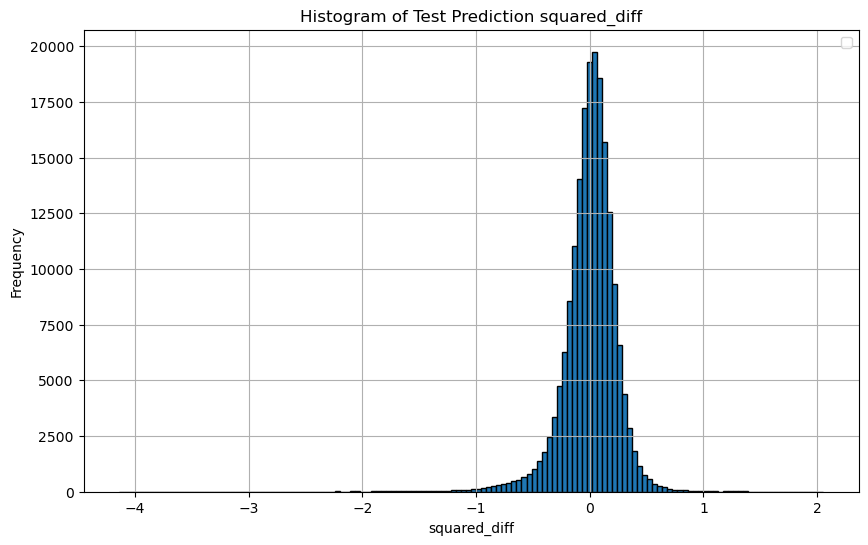

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
# Plot histogram of correlations
plt.hist(df_x['diff'], bins=140, edgecolor='black')
plt.xlabel('squared_diff')
plt.ylabel('Frequency')
plt.title('Histogram of Test Prediction squared_diff')
plt.legend()
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


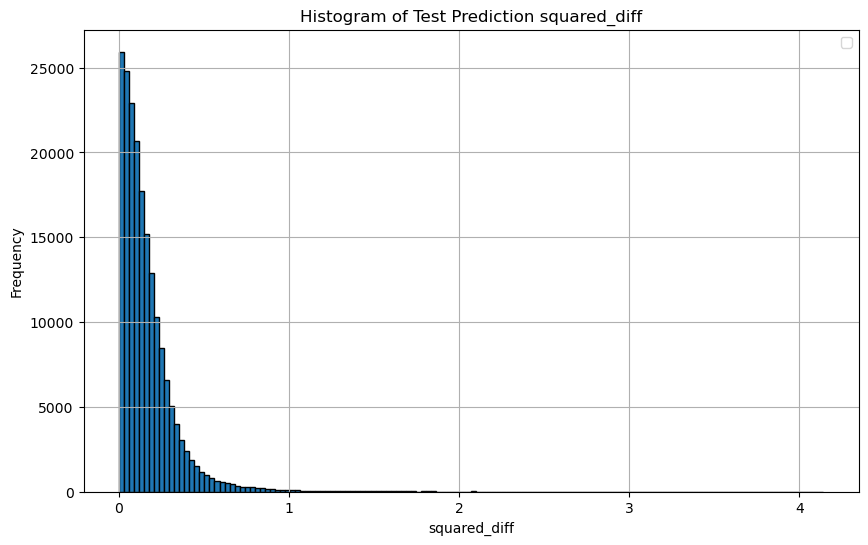

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
# Plot histogram of correlations
plt.hist(df_x['abs_diff'], bins=140, edgecolor='black')
plt.xlabel('squared_diff')
plt.ylabel('Frequency')
plt.title('Histogram of Test Prediction squared_diff')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
import numpy as np  

percentile_1 = np.percentile(df_x['abs_diff'], 1)
percentile_25 = np.percentile(df_x['abs_diff'], 25)
percentile_50 = np.percentile(df_x['abs_diff'], 50)
percentile_75 = np.percentile(df_x['abs_diff'], 75)
percentile_90 = np.percentile(df_x['abs_diff'], 90)
percentile_95 = np.percentile(df_x['abs_diff'], 95)
percentile_99 = np.percentile(df_x['abs_diff'], 99)

description_with_percentiles = df_x['abs_diff'].describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])
description_with_percentiles.loc['1%',] = percentile_1
description_with_percentiles.loc['25%',] = percentile_25
description_with_percentiles.loc['50%',] = percentile_50
description_with_percentiles.loc['75%',] = percentile_75
description_with_percentiles.loc['90%',] = percentile_90
description_with_percentiles.loc['95%',] = percentile_95
description_with_percentiles.loc['99%',] = percentile_99
description_with_percentiles

count    191245.000000
mean          0.161867
std           0.161856
min           0.000002
1%            0.002205
25%           0.055675
50%           0.120366
75%           0.216059
90%           0.337405
95%           0.444211
99%           0.792345
max           4.140918
Name: abs_diff, dtype: float64